* RMSE - еhis method can be cumbersome when there are many variables involved
* When a model contains extraneous variables (variables that are not related to the outcome of interest), it can become more difficult to interpret the model. It can also lead to __overfitting__, where the model may change drastically if you use a different subset of the data to train the model. Therefore, it is important to select only those features that are related to the outcome for training the model.
* One common way to select which features will be used by a model is to use __regularization.__ The idea of regularization is that the model will be asked not only to try to predict the training points as accurately as possible, but will have the additional constraint of trying to minimize the weight that it puts on each of the variables. With some forms of regularization, this leads to some variables being dropped entirely. Specifically, a type of model called __lasso regression__ uses a form of regularization that encourages the model to drop variables that are not useful for production. Other than using regularization to find the coefficients for the model, it is just like ordinary linear regression, resulting in a model that can be written down as a simple equation.

#### Using Lasso Regression for Feature selection

Given data on the revenue of
stores at different locations, and a series of 20 scores based on
internal metrics. You aren’t told what the scores mean, but are
asked to build a predictive model that uses as few of these as
possible without sacrificing the ability to predict the location
revenue:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_science/20scores.csv")
df.head()

,revenue,score0,score1,score2,score3,score4,score5,score6,score7,score8,...,score10,score11,score12,score13,score14,score15,score16,score17,score18,score19
0,30698.74,0.067763,1.762772,0.211119,0.619655,-1.586284,0.051320,-0.529940,-0.177908,-0.387431,...,-1.246132,-1.817742,-0.189583,-1.636507,0.088087,0.481573,2.243539,0.330061,-1.019798,-1.409513
1,46813.75,0.943657,-0.696100,3.503075,1.323145,-0.579567,-1.379598,0.013465,1.061996,-0.952645,...,1.115770,0.455824,0.109667,-0.790210,1.876311,0.610918,0.208647,1.505998,0.671251,0.315013
2,39493.35,-0.070838,-1.817580,-0.156724,-0.159741,-1.564338,-0.817489,0.125174,-1.053015,0.181246,...,-0.006912,-0.009129,-0.324959,1.040768,0.375134,-0.127496,1.435406,3.267201,-0.010580,-1.725084
3,48130.55,-0.133306,0.815997,2.261204,0.794839,-0.947440,0.049189,-0.042403,1.657086,-2.870217,...,2.183177,0.364106,0.686530,0.112862,1.840957,-1.003409,1.641141,1.469621,-1.839971,-0.456130
4,35129.09,0.452780,1.529394,0.085364,-0.787245,1.351148,-0.340774,0.354099,-0.319731,-0.776033,...,2.000792,1.035293,-0.719229,-3.073072,-0.078145,-0.154752,0.117198,0.226051,-1.447333,0.463009


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_cols = df.columns[1:]
X = df[x_cols]
y = df['revenue']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.coef_

array([ 3.10465458e+01,  1.35929333e+00, -1.71996170e+01, -4.26396854e+00,
       -4.56514104e+00,  2.71178012e+01,  1.12523398e+01, -9.62768549e+00,
        1.28097189e+01, -3.82102937e+01, -3.92691076e+00, -4.49267755e+00,
        9.12581579e+03,  2.81237962e+01,  1.26722148e+01,  1.99096955e+01,
       -1.73401880e+01,  3.77047162e+03, -7.57356369e+00,  4.99844116e+03])

Now import Lasso from sklearn and fit a lasso
regression to the training data (using
random_state=10). Also make sure to normalize the
data; this ensures that the data the model is fitting to is on
the same scale, so the regularization treats all variables
equally. This is not required with normal linear regression
because there is no regularization involved:

In [9]:
from sklearn.linear_model import Lasso

In [10]:
lasso_model = Lasso(normalize=True, random_state=10)

In [11]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=10, selection='cyclic',
      tol=0.0001, warm_start=False)

In [12]:
lasso_model.coef_

array([ 4.26184401e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.28279999e+01, -0.00000000e+00, -0.00000000e+00,
        9.10035968e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.74239596e+03, -0.00000000e+00,  4.97252311e+03])

Note that many of these coefficients are now 0. The model
has decided not to use these variables. If we knew what
the variables were, we could examine which variables the
model has chosen to use.

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
predictions = model.predict(X_test)

In [15]:
print(mean_squared_error(predictions, y_test)**0.5)

491.78833768572633


In [16]:
lasso_predictions = lasso_model.predict(X_test)

In [17]:
print(mean_squared_error(lasso_predictions, y_test)**0.5)

488.6093127438785


You can observe that, although the lasso regression is not
using most of the variables, its RMSE is very similar to the
linear model that uses all of them. This shows that it has not
lost any predictive power, even though it has greatly
simplified the model by removing variables.

#### Tree-Based Regression Models

Another powerful technique is to use regression trees.
Regression trees are based on the idea of a decision tree. A
decision tree is a bit like a flowchart, where at each step you
ask whether a variable is greater than or less than some value.
After flowing through several of these steps, you reach the end
of the tree and receive an answer for what value the prediction
should be.

A regression tree (left) and how it parses the feature space into
predictions

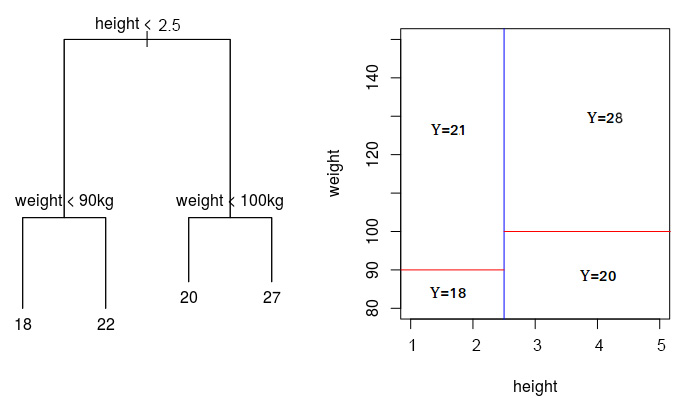

Regression trees result in step functions, which can fit certain kinds of
relationships more accurately.
One important hyperparameter for regression trees is the
maximum depth of the tree. The more depth that a tree is
allowed, the more complex a relationship it can model. While
this may sound like a good thing, choosing too high a
maximum depth can lead to a model that is highly overfitted
to the data. In fact, the tendency to overfit is one of the biggest
drawbacks of regression trees.

#### Random Forests

To overcome the issue of overfitting, instead of training a
single tree to find patterns in data, many trees are trained
over random subsets of the data. The predictions of these
trees are then averaged to produce a prediction. Combining
trees together in this way is called a random forest. This
technique has been found to overcome many of the
weaknesses of regression trees.

An ensemble of tree models

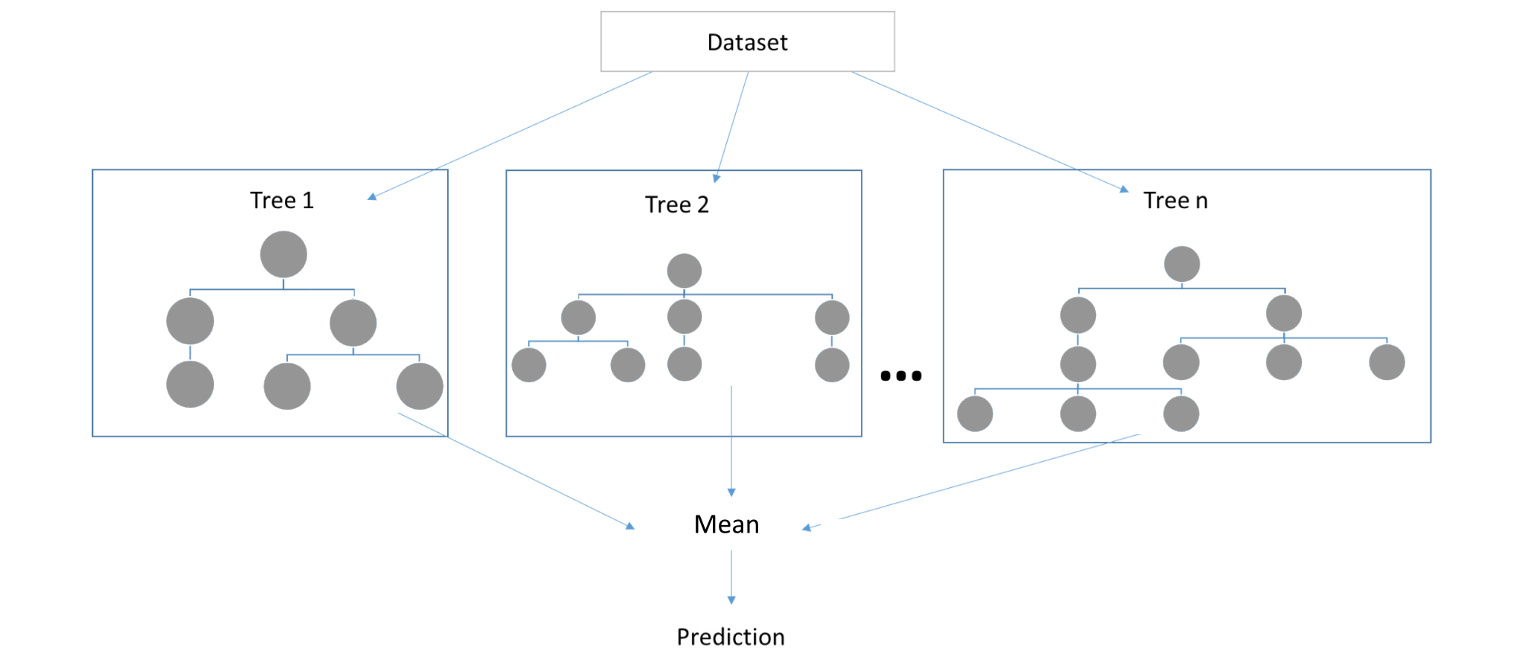

Random forests are based on the idea of creating an
ensemble, which is where multiple models are combined
together to produce a single prediction. This is a powerful
technique that can often lead to very good outcomes. In the
case of random forests, creating an ensemble of regression
trees together in this way has been shown to not only decrease
overfitting, but also produce very good predictions in a wide
variety of scenarios.

#### Using tree-based regression models to capture non-linear trends

We want to
figure out how spending habits change with age in our
customers, and how well different models can capture this
relationship:

In [18]:
df = pd.read_csv('data_science/age_spend.csv')
df.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [19]:
X = df[['age']]
y = df['spend']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [23]:
max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For the linear model and the two regression tree models, get
predictions from the model for the test set and use these to calculate the RMSE.

In [25]:
linear_predictions = model.predict(X_test)

print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))

Linear model RMSE: 159.07639273785358


In [26]:
max2_tree_predictions = max2_tree_model.predict(X_test)

print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))

Tree with max depth of 2 RMSE: 125.1920405443602


In [27]:
max5_tree_predictions = max5_tree_model.predict(X_test)

print('Tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

Tree with max depth of 5 RMSE: 109.73376798374653


Notice that the linear model has the largest error, the decision tree with a max depth of 2 does better, and the decision tree with a max depth of 5 has the lowest error of the 3.

Create a variable called ages to
store a DataFrame with a single column containing ages
from 18 to 70, so that we can have our models give us
their predictions for all of these ages:

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
ages = pd.DataFrame({'age': range(18,70)})

Create a scatter plot with the test data and plot on top of it
the predictions from the linear regression model for the
range of ages.

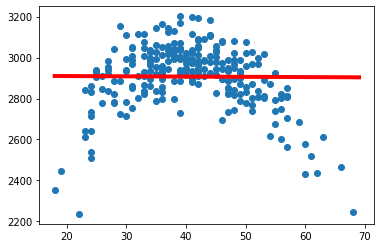

In [30]:
# The predictions of the linear regression model

plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, model.predict(ages), color='r', linewidth=4)
plt.show()

Create another scatter plot with the test data, this time
plotting the predictions of the max2_tree model on top
with color=’g’ and linewidth=5:

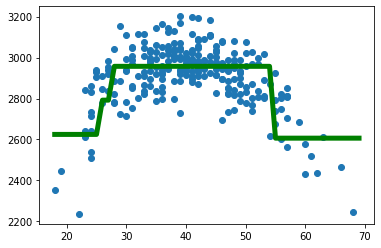

In [31]:
# The predictions of the regression tree model with max_depth of 2
# it does not capture the sharp decline in the oldest or youngest population.

plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max2_tree_model.predict(ages), color='g', linewidth=5)
plt.show()

Create another scatter plot with the test data, this time
plotting the predictions of the max5_tree model on top with color=’k’ and linewidth=5:

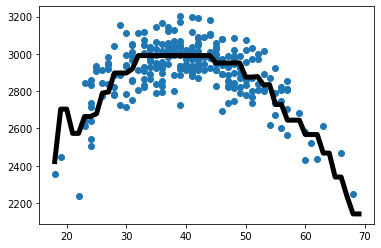

In [32]:
# The predictions of the regression tree model with max_depth of 5
# properly capturing a sharp decline in the oldest or youngest population.

plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max5_tree_model.predict(ages), color='k', linewidth=5);

Let’s now perform random forest regression on the same 
data. Fit two random forest models with random_state=10,
one with max_depth=2 and the other with max_depth=5, and save these as max2_forest and max5_forest, respectively:

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
max2_forest_model = RandomForestRegressor(max_depth=2, random_state=10)

In [35]:
max2_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [36]:
max5_forest_model = RandomForestRegressor(max_depth=5, random_state=10)

In [37]:
max5_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [38]:
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: ' + str(mean_squared_error(max2_forest_predictions, y_test)**0.5))

Max depth of 2 RMSE: 116.57417072810561


In [39]:
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: ' + str(mean_squared_error(max5_forest_predictions, y_test)**0.5))

Max depth of 5 RMSE: 109.05510027963649


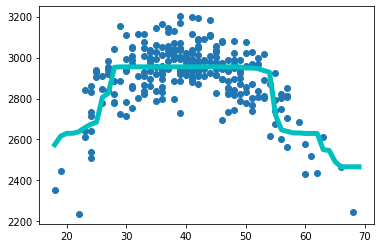

In [40]:
# The predictions of the random forest model with max_depth of 2

plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max2_forest_model.predict(ages), color='c', linewidth=5)
plt.show()

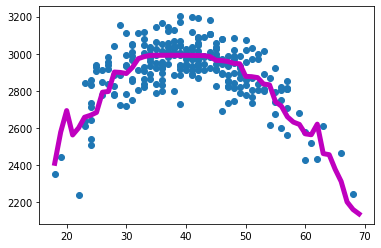

In [41]:
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max5_forest_model.predict(ages), color='m', linewidth=5)
plt.show()